In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing, metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict, train_test_split
from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('cardio_cleaned.csv')
df.rename(columns = {'cholesterol_1':'chol_1', 'cholesterol_2':'chol_2', 'cholesterol_3':'chol_3'}, inplace = True)
df = df.dropna()
print(df.shape)
df.head()

(68030, 16)


,age,height,weight,ap_hi,ap_lo,chol_1,chol_2,chol_3,gluc_1,gluc_2,gluc_3,gender,smoke,alco,active,cardio
0,0.588076,0.579487,0.269841,0.666667,0.576923,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.730159,0.517949,0.391534,0.743590,0.615385,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,0.624003,0.564103,0.280423,0.717949,0.538462,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.528455,0.584615,0.375661,0.769231,0.653846,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
4,0.516918,0.517949,0.238095,0.641026,0.500000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
def plot_2d_space(X, y, label='Classes'):   
    colors = ['#1F77B4', '#FF7F0E']
    markers = ['o', 's']
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(
            X[y==l, 0],
            X[y==l, 1],
            c=c, label=l, marker=m
        )
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()

In [4]:
def lrcv(key, target_vars, resample=True):
    X = df.drop(target_vars[key], axis=1)
    y = df[key]
    print('\n{0}\n'.format(key))

    cols = X.columns
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42) # 80% training and 20% test

    if resample:
        smote = SMOTE()
        print("Before oversampling, counts of label '1': {}".format(sum(y_train==1)))
        print("Before oversampling, counts of label '0': {} \n".format(sum(y_train==0)))
        X_train, y_train = smote.fit_sample(X_train, y_train.ravel())
        print("After oversampling, counts of label '1': {}".format(sum(y_train==1)))
        print("After oversampling, counts of label '0': {} \n".format(sum(y_train==0)))
#         plot_2d_space(X_sm, y_sm, 'SMOTE over-sampling')
        
    clf = LogisticRegression()
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    
#     predicted = cross_val_predict(LogisticRegression(), X, y, cv=cv)
    print('accuracy: ' + str(metrics.accuracy_score(y_test, y_pred)))
    print(metrics.classification_report(y_test, y_pred))
    
    feature_coefs = pd.Series(clf.coef_.reshape(-1),index=cols).sort_values(ascending=False)
    print(feature_coefs)
    
    print('Confusion matrix:\n')
    cm = metrics.confusion_matrix(y_test,y_pred)
    df_cm = pd.DataFrame(cm, index = [i for i in [0,1]],
                  columns = [i for i in [0,1]])
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=True)

    return clf
    


cardio

accuracy: 0.5999559018080258
              precision    recall  f1-score   support

         0.0       0.57      0.81      0.67      6884
         1.0       0.67      0.38      0.48      6722

   micro avg       0.60      0.60      0.60     13606
   macro avg       0.62      0.60      0.58     13606
weighted avg       0.62      0.60      0.58     13606

chol_3    0.950996
gluc_2    0.352414
gluc_1    0.169182
height    0.124761
ap_hi     0.123848
gender    0.122460
age       0.074648
weight    0.073724
chol_2    0.025754
alco     -0.089396
gluc_3   -0.138901
smoke    -0.199376
active   -0.203734
ap_lo    -0.523252
chol_1   -0.594055
dtype: float64
Confusion matrix:



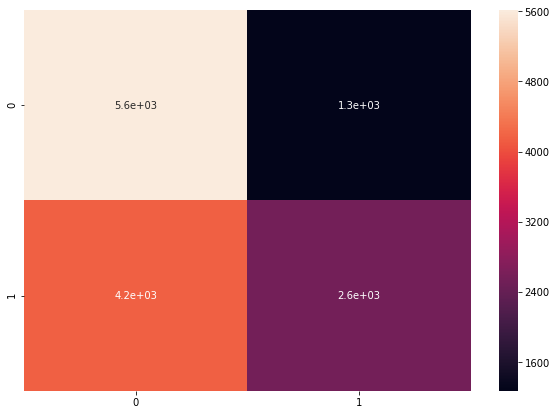

In [5]:
target_vars = {'cardio': ['cardio'], 'gluc_3':['gluc_1', 'gluc_2', 'gluc_3', 'cardio'], 'chol_3':['chol_1', 'chol_2', 'chol_3', 'cardio']}

clf = lrcv('cardio', target_vars, resample=False)


gluc_3

Before oversampling, counts of label '1': 4091
Before oversampling, counts of label '0': 50333 

After oversampling, counts of label '1': 50333
After oversampling, counts of label '0': 50333 

accuracy: 0.9079817727473174
              precision    recall  f1-score   support

         0.0       0.97      0.93      0.95     12523
         1.0       0.45      0.65      0.53      1083

   micro avg       0.91      0.91      0.91     13606
   macro avg       0.71      0.79      0.74     13606
weighted avg       0.93      0.91      0.92     13606

chol_3    2.075399
height    0.945835
ap_lo     0.457889
alco      0.034332
active    0.025183
gender   -0.003171
smoke    -0.131736
age      -0.232470
ap_hi    -0.387192
weight   -0.819442
chol_2   -0.855841
chol_1   -1.179844
dtype: float64
Confusion matrix:



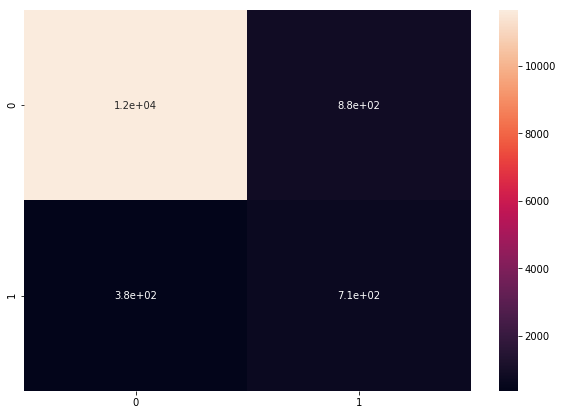

In [6]:
clf = lrcv('gluc_3', target_vars, resample=True)


chol_3

Before oversampling, counts of label '1': 6217
Before oversampling, counts of label '0': 48207 

After oversampling, counts of label '1': 48207
After oversampling, counts of label '0': 48207 

accuracy: 0.9002645891518448
              precision    recall  f1-score   support

         0.0       0.93      0.96      0.94     12025
         1.0       0.59      0.46      0.52      1581

   micro avg       0.90      0.90      0.90     13606
   macro avg       0.76      0.71      0.73     13606
weighted avg       0.89      0.90      0.89     13606

gluc_3    2.129594
height    0.845736
alco      0.380643
age       0.289442
ap_lo     0.265244
active    0.227801
smoke     0.121630
gender   -0.195790
weight   -0.473307
gluc_2   -0.716066
ap_hi    -0.800610
gluc_1   -1.115854
dtype: float64
Confusion matrix:



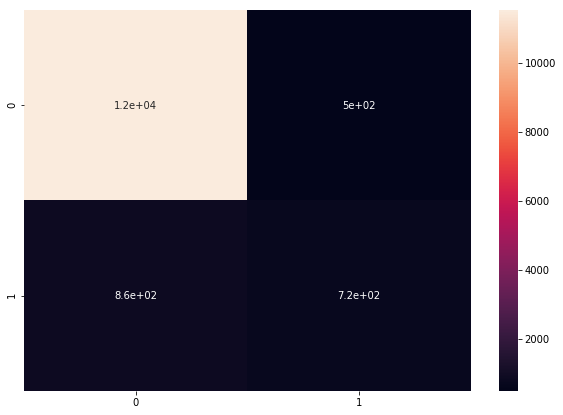

In [7]:
clf = lrcv('chol_3', target_vars, resample=True)